A1 de Linguagens de Programação – 19/09/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Vitoria Mesquita Leite
Olá, Vitoria Mesquita Leite!
Bom trabalho!


In [2]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import time
from IPython.display import clear_output
%matplotlib inline

Questão 1 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:  
a) Crie uma função genérica para construir um dicionário de frequências de palavras de um texto (string), passado como parâmetro. Aplique a função ao texto;  
b) Identifique os candidatos a nomes próprios no texto;  
c) Imagine que o texto seja constituído pela soma de suas letras, com repetições. Com esta "caixa de letras", quantas vezes você conseguiria escrever seu nome completo? Use as letras da variável meu_nome, sem os espaços em branco.  
d) Identifique as palavras que só ocorrem uma vez;  
e) Crie código para salvar os resultados em um arquivo chamado "respostas_q1.txt" no computador.  

In [3]:
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [4]:
def freq_dic(t):
    dic={}
    palavras= [p.lower().strip(string.punctuation) for p in t.split()]
    for x in palavras:
        if x in dic:
            dic[x]=dic[x]+1
        else:
            dic[x]=1
    return dic

In [5]:
nomes= [p for p in texto.split() if p.istitle()==True]

In [121]:
def letras(txt):
    v=0 #cont1
    i=0 #cont2
    t=0 #cont3
    o=0 #cont4
    r=0 #cont5
    a=0 #cont6
    v=txt.count('v')+txt.count('V')
    i=txt.count('i')+txt.count('I')+txt.count('í')+txt.count('Í')
    t=txt.count('t')+txt.count('T')
    o=txt.count('o')+txt.count('O')+txt.count('ó')+txt.count('Ó')
    r=txt.count('r')+txt.count('R')
    a=txt.count('a')+txt.count('A')+txt.count('á')+txt.count('Á')
    lista=[v,t,o,r,a]
    x=min(lista)
    if i==x*2 or i>x*2:
        return min(lista)
    else:
        print('Não é possível formar nenhuma vez')
        

In [267]:
t2=letras(texto)

In [255]:
a=freq_dic(texto)

In [262]:
t1=list(a.items())

In [8]:
def umavez(txt):
    lista=[]
    a=freq_dic(texto)
    for k in list(a.keys()):
        if a[k]==1:
            lista.append(k)
        else:
            pass
    return lista
            


In [264]:
t3=umavez(texto)


In [268]:
f = open('Respostas_q1.txt', mode='w', encoding='utf-8')
t1=str(t1)
t2=str(t2)
t3=str(t3)
nomes=str(nomes)

f.write(t1)
f.write(t2)
f.write(t3)
f.write(nomes)


59322

Questão 2 (2.0 pontos)  

Seja d(n) definido como a suma dos divisores inteiros de n. Se d(a) = b e d(b) = a, sendo a ≠ b, então a e b são um "par amigável" de números.  

Por exemplo, os divisores inteiros de 220 são 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 e 110; então d(220) = 284.  
Os divisores inteiros de 284 são 1, 2, 4, 71 e 142; então d(284) = 220.  

Encontre todos os "pares amigáveis" de números menores que 20000.  Crie uma lista de tuplas com esses pares.  

In [10]:
def somadiv(n):
    cont=1
    divisores=[]
    while cont<n+1:
        if n%cont==0:
            divisores.append(cont)
        else:
            pass
        cont=cont+1
    return sum(divisores)
            

In [269]:
def pares_a():
    pares1=[]
    pares2=[]
    for a in range(1,20000):
        b=somadiv(a)
        x=somadiv(b)
        if a!=b and x==b:
            pares1.append(b)
            pares2.append(x)
        else:
            pass
    return zip(pares1,pares2)

Questão 3 (2.5 pontos)  

Usando funções geradoras, crie um objeto que emule um dado de oito faces (1-8) que seja viciado, de tal forma que a probabilidade desta função geradora retornar certo valor seja proporcional ao próprio valor (por exemplo, a face 6 é 3 vezes mais provável de sair do que a face 2).  

(a) Usando os comandos plt.plot ou plt.hist, mostre graficamente o resultado de 10000 lançamentos;  
(b) Modifique esta função geradora de forma que ela termine automaticamente quando todos os valores possíveis (1,2,3,4,5,6,7,8) tiverem sido retornados pelo menos uma vez. Neste caso, ela retornará o tempo absoluto total que ocorreu desde a primeira iteração.  

In [110]:
def gen_dado(): #farei um dado que o 6 é 3 vezes mais provável que o 2
    a=[1,2,2,3,4,5,6,6,6,6,6,6,7,8]
    b=len(a)-1
    c=random.randint(0,b)
    yield a[c]

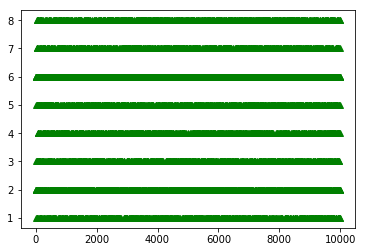

In [111]:
x = list(range(10000))
y = [next(gen_dado()) for x in range(10000)]
plt.plot(x,y,'^g')
plt.show()

In [203]:
def gen_dado2(): #farei um dado que o 6 é 3 vezes mais provável que o 2
    hora=time.time()
    x=[1,2,3,4,5,6,7,8]
    a=[1,2,2,3,4,5,6,6,6,6,6,6,7,8]
    inter = [p for p in x if p in a]
    b=len(a)-1
    c=random.randint(0,b)
    x.pop(a[c]-1)
    if inter!=[]:
        yield a[c]
    else:
        return time.time()-hora

In [ ]:
1,2,8,4,6,5,7

Questão 4 (3.0 pontos)   

Crie uma classe chamada "Elevador" que recebe, ao instanciada, o número de andares do edifício e inicia no andar mais baixo.  
Crie métodos e propriedades para permitir que o elevador:  
- Receba uma chamada (usuário aperta um botão em um andar);  
- Receba um andar como destino (usuários apertam botões dentro do elevador);  
- Informe em qual andar o elevador está;  
- Informe a sequência de andares ainda por visitar;
- Informe a quantidade de vezes que parou em cada andar (passar pelo andar sem "parar" no andar não conta);  

Leve em consideração que cada deslocamento de andar demora 3 segundos.  
Simule o comportamento do elevador atendendo à dez usuários, que têm andar de origem, andar de destino e sequência de chegada (fora e dentro do elevador) definidos aleatóriamente.  

In [278]:
a=[2,8,0]
b=sorted(a,reverse=True)
b

[8, 2, 0]

In [477]:
class Elevador:
    def __init__(self,andares): #Vou fazer um elevador que desce e sobe o tempo inteiro
        self.alto=andares
        self.nivel=0
        self.tempo=time.time()
        self.visita=[]
        self.vezes=[]
        self.dir=1 #1 subindo e 0 descendo
    def chamada(self,a):
        if a>self.alto:
            print('Não possui esse andar')
        else:
            self.visita.append(a)
    def destino(self,b):
        if b>self.alto:
            print('Não possui esse andar')
        else:
            self.visita.append(b)
    def qualandar(self):
        passo= int((time.time()-self.tempo)/3)
        self.tempo=time.time()
        if self.dir==1:
            if self.nivel+passo<self.alto or self.nivel+passo==self.alto:
                for x in range(passo):
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    self.nivel=self.nivel+1
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    
            else:
                self.dir==0
                conte=0
                while self.nivel<self.alto:
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    self.nivel=self.nivel+1
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    conte=conte+1
                for k in range(passo-conte):
                    self.nivel=self.nivel-1
                    self.vezes.append(self.nivel)
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    
        elif self.dir==0:
            if self.nivel-passo>0 or self.nivel-passo==0:
                for x in range(passo):
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    self.nivel=self.nivel-1
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    
                
            else:
                cont=0
                while self.nivel>0:
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    self.nivel=self.nivel-1
                    if self.nivel in self.visita:
                         self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
                    cont=cont+1
                for j in range(passo-cont):
                    self.nivel=self.nivel+1
                    if self.nivel in self.visita:
                        self.visita.remove(self.nivel)
                    self.vezes.append(self.nivel)
        return self.nivel
    def listaandar(self):
        self.visita=set(self.visita)
        return self.visita
    def qtsvzs(self):
        return self.vezes

Questão bônus I (0.5 ponto)   

Ilustre graficamente as posições do elevador acima para a simulação pedida:  

Questão bônus II (0.5 ponto)   

Crie um simulador de prédio inteligente, controlando chamadas feitas para n > 1 elevadores:  

In [16]:
#seu código aqui